# Project 6: Wrangle and Analyze Data - WeRateDogs

Table of contents:

1) Gathering Data

2) Assessing Data

3) Cleaning Data

4) Data Visualization

# Part 1: Data Gathering 

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

Download twitter_archive_enhanced.csv manually

Downloaded image_predictions.tsv programmatically with Requests library URL: 
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using
Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas 
DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API 
keys, secrets, and tokens in your project submission.

In [103]:
#Import neccessary packeges
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import requests
import io

In [104]:
# Load jason.txt file in pandas dataframe from given url.
json_url = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(json_url)
data = r.content.decode('utf-8')
json_tweets = pd.read_json(data, lines = True)
json_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmo

In [105]:
# load image-predictions.tsv file from the given url.
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), delimiter='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [106]:
# read the given csv file in pandas dataframe.
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [107]:
# only keep useful column.
json_tweets = json_tweets[['id', 'display_text_range', 'favorite_count','retweet_count']]
json_tweets.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


# Part 2: Data Assessing

* Assessing df dataset which is in .csv file.

In [108]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [109]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [111]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [112]:
df['name'].value_counts()

None         745
a            55 
Charlie      12 
Lucy         11 
Cooper       11 
Oliver       11 
Penny        10 
Lola         10 
Tucker       10 
Bo           9  
Winston      9  
Sadie        8  
the          8  
an           7  
Buddy        7  
Bailey       7  
Toby         7  
Daisy        7  
Jack         6  
Scout        6  
Rusty        6  
Stanley      6  
Koda         6  
Dave         6  
Oscar        6  
Milo         6  
Jax          6  
Leo          6  
Bella        6  
Louis        5  
            ..  
Lillie       1  
Kallie       1  
Kathmandu    1  
Carll        1  
Miguel       1  
Dixie        1  
Fido         1  
Champ        1  
Barclay      1  
Hall         1  
Cupid        1  
Creg         1  
Kody         1  
Karma        1  
Enchilada    1  
Bertson      1  
Shikha       1  
all          1  
Gustaf       1  
Damon        1  
Ester        1  
Margo        1  
Jo           1  
Schnitzel    1  
Durg         1  
Chase        1  
Petrick      1  
Georgie      1

In [113]:
df.duplicated().any()

False

In [114]:
df.duplicated().sum()

0

In [115]:
# Assessing wether a tweet is retweet or not.
df[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().any()

retweeted_status_id           True
retweeted_status_user_id      True
retweeted_status_timestamp    True
dtype: bool

In [116]:
df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [117]:
df.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [118]:
df.source.head()

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [119]:
df.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [120]:
df[df['retweeted_status_id'].notnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" re

In [121]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [122]:
# Select rows which contain '&amp' instead '&' in text column.
df[df.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,

* Assessing json_tweets file which is present in json.

In [123]:
json_tweets.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


In [124]:
json_tweets.tail()

,id,display_text_range,favorite_count,retweet_count
2349,666049248165822465,"[0, 120]",111,41
2350,666044226329800704,"[0, 137]",311,147
2351,666033412701032449,"[0, 130]",128,47
2352,666029285002620928,"[0, 139]",132,48
2353,666020888022790149,"[0, 131]",2535,532


In [125]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                    2354 non-null int64
display_text_range    2354 non-null object
favorite_count        2354 non-null int64
retweet_count         2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [126]:
json_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [127]:
json_tweets.isnull().sum

<bound method DataFrame.sum of          id  display_text_range  favorite_count  retweet_count
0     False  False               False           False        
1     False  False               False           False        
2     False  False               False           False        
3     False  False               False           False        
4     False  False               False           False        
5     False  False               False           False        
6     False  False               False           False        
7     False  False               False           False        
8     False  False               False           False        
9     False  False               False           False        
10    False  False               False           False        
11    False  False               False           False        
12    False  False               False           False        
13    False  False               False           False        
14    False  False      

In [128]:
json_tweets.dtypes

id                    int64 
display_text_range    object
favorite_count        int64 
retweet_count         int64 
dtype: object

* Accessing image_predictions data which is present in .tsv

In [129]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [130]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [131]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [132]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [133]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [134]:
image_predictions.dtypes

tweet_id    int64  
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [135]:
image_predictions.duplicated().sum()

0

In [136]:
image_predictions.duplicated().any()

False

# Part 3: Data Cleaning

* Cleaning df dataset which is in .csv file.

In [137]:
df_clean = df.copy()

# 1) Define:

* numerator_rating and denominator should me merge in one coloumn instead of two column.
* Fix tideness issues.

# Code:

In [138]:
# add numerator and denominator in to one column.
df_clean['rating'] = df_clean['rating_numerator'].astype(str) + "/" + df_clean['rating_denominator'].astype(str)


# Test:

In [139]:
df_clean.rating.head()

0    13/10
1    13/10
2    12/10
3    13/10
4    12/10
Name: rating, dtype: object

In [140]:
df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [141]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12/10


# 2) Define:

* Split date and time in two seperate column instead of one column.
* Fix tideness issues.

# Code:

In [142]:
df_clean['date'], df_clean['time'] = df_clean['timestamp'].str.split(' ',1).str
df_clean = df_clean.drop('timestamp', axis = 1)

# Test:

In [143]:
df_clean[['date', 'time']].head()

,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000


# 3) Define:

* Remove '+0000' from date column of df_clean file.
* Fix Quality issues.

# Code:

In [144]:
df_clean['time'] = df_clean['time'].str.rstrip('+0000')

# Test:

In [145]:
df_clean['time'].head()

0    16:23:56 
1    00:17:27 
2    00:18:03 
3    15:58:51 
4    16:00:24 
Name: time, dtype: object

# 4) Define:

* In name column there are multiple expression which are wrongly name convert these wrongly name to none.
* Fixing quality issues.

# Code:

In [146]:
name = ['a','an','the','light','life','by','actually','just','getting','infuriating','old','all','this','very',
              'mad','not','one','my','O','quite','such']
df_clean['name'] = df_clean['name'].replace(name , 'none' )

# Test:

In [147]:
df_clean.name

0       Phineas 
1       Tilly   
2       Archie  
3       Darla   
4       Franklin
5       None    
6       Jax     
7       None    
8       Zoey    
9       Cassie  
10      Koda    
11      Bruno   
12      None    
13      Ted     
14      Stuart  
15      Oliver  
16      Jim     
17      Zeke    
18      Ralphus 
19      Canela  
20      Gerald  
21      Jeffrey 
22      none    
23      Canela  
24      None    
25      None    
26      Maya    
27      Mingus  
28      Derek   
29      Roscoe  
         ...    
2326    none    
2327    none    
2328    None    
2329    None    
2330    None    
2331    None    
2332    None    
2333    none    
2334    none    
2335    none    
2336    None    
2337    None    
2338    None    
2339    None    
2340    None    
2341    None    
2342    None    
2343    None    
2344    None    
2345    none    
2346    none    
2347    none    
2348    none    
2349    none    
2350    none    
2351    None    
2352    none    
2353    none  

# Define 5:

* change 'tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',          'retweeted_status_user_id' from float to integer
* Fixing quality issues.

# Code:

In [148]:
ids = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
df_clean[ids] = df_clean[ids].astype(str)

# Test:

In [149]:
df_clean.dtypes

tweet_id                      int64 
in_reply_to_status_id         object
in_reply_to_user_id           object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
rating                        object
date                          object
time                          object
dtype: object

# Define 6:

* Drop the rows when the values of retweet_ids are not none.
* Fixing quality issues.

# Code:

In [150]:
df_clean[df_clean.retweeted_status_id != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating,date,time
19,888202515573088257,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.87473957104e+17,4196983835.0,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",Canela,None,None,None,None,13/10,2017-07-21,01:02:36
32,886054160059072513,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.86053734421e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",None,None,None,None,None,12/10,2017-07-15,02:45:48
36,885311592912609280,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.30583320585e+17,4196983835.0,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",Lilly,None,None,None,None,13/10,2017-07-13,01:35:06
68,879130579576475649,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.7805761304e+17,4196983835.0,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",Emmy,None,None,None,None,14/10,2017-06-26,00:13:58
73,878404777348136964,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.78281511006e+17,4196983835.0,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",Shadow,None,None,None,None,13/10,2017-06-24,00:09:53
74,878316110768087041,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.69000397446e+17,4196983835.0,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,Terrance,None,None,None,None,11/10,2017-06-23,18:17:33
78,877611172832227328,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.76850772323e+17,512804507.0,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",None,None,None,pupper,None,14/10,2017-06-21,19:36:23
91,874434818259525634,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco

In [151]:
df_clean.drop(df_clean[df_clean.retweeted_status_id != 'nan'].index , inplace=True )

# Test:

In [152]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating,date,time
0,892420643555336193,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13/10,2017-08-01,16:23:56
1,892177421306343426,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13/10,2017-08-01,00:17:27
2,891815181378084864,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12/10,2017-07-31,00:18:03
3,891689557279858688,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13/10,2017-07-30,15:58:51
4,891327558926688256,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12/10,2017-07-29,16:00:24
5,891087950875897856,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,None,None,None,None,13/10,2017-07-29,00:08:17
6,890971913173991426,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,None,None,None,None,13/10,2017-07-28,16:27:12
7,890729181411237888,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,nan,nan,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,None,None,None,None,13/10,2017-07-28,00:22:40
8,890609185150312448,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,None,None,None,None,13/10,2017-07-27,16:25:51
9,890240255349198849,nan,nan,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Tw

# Define 7:

* There are missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'. The columns can be dropped since they are not relevant for analysis purpose.
* Fixing quality issues.

# Code:

In [153]:
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)


# Test:

In [154]:
df_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'rating', 'date', 'time'],
      dtype='object')

# Define 8:

* Create dog stage variable and remove individual dog stage columns.
* Fixing quality issues.

# Code:

In [155]:
df_clean['dog_stage'] = df_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [156]:
list_name = ['doggo', 'floofer', 'pupper', 'puppo']
df_clean = df_clean.drop(list_name, axis=1)

# Test:

In [157]:
df_clean

,tweet_id,source,text,expanded_urls,name,rating,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13/10,2017-08-01,16:23:56,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13/10,2017-08-01,00:17:27,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12/10,2017-07-31,00:18:03,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13/10,2017-07-30,15:58:51,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12/10,2017-07-29,16:00:24,NaN
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,13/10,2017-07-29,00:08:17,NaN
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,13/10,2017-07-28,16:27:12,NaN
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,13/10,2017-07-28,00:22:40,NaN
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13/10,2017-07-27,16:25:51,NaN
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,14/10,2017-07-26,15:59:51,doggo


# Define 9:

* Display full content of 'text' column.
* Fixing quality issues.

# Code:

In [158]:
pd.set_option('display.max_colwidth', -1)

# Test:

In [159]:
df_clean.head(10)

,tweet_id,source,text,expanded_urls,name,rating,date,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13/10,2017-08-01,16:23:56,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13/10,2017-08-01,00:17:27,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12/10,2017-07-31,00:18:03,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13/10,2017-07-30,15:58:51,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12/10,2017-07-29,16:00:24,NaN
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,13/10,2017-07-29,00:08:17,NaN
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,13/10,2017-07-28,16:27:12,NaN
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,13/10,2017-07-28,00:22:40,NaN
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,13/10,2017-07-27,16:25:51,NaN
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,14/10,2017-07-26,15:59:51,doggo


# Define 10:

* Change missing values in 'name' from 'None' to NaN
* Fixing quality issues.

# Code:

In [160]:
df_clean['name'] = df_clean['name'].replace('None', np.NaN)

# Test:

In [161]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id         2175 non-null int64
source           2175 non-null object
text             2175 non-null object
expanded_urls    2117 non-null object
name             1495 non-null object
rating           2175 non-null object
date             2175 non-null object
time             2175 non-null object
dog_stage        364 non-null object
dtypes: int64(1), object(8)
memory usage: 169.9+ KB


# Define 11:

* Remove tweet without rating
* Fixing quality issues.

# Code: 

In [162]:
df_clean = df_clean[df_clean.tweet_id != 810984652412424192]

# Test:

In [163]:
df_clean[df_clean.tweet_id == 810984652412424192]

,tweet_id,source,text,expanded_urls,name,rating,date,time,dog_stage


# Define 12:

* Remove extra character after '&' in text column of text file.

# Code

In [164]:
df_clean['text'] = df_clean.text.str.replace('&amp;', '&')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Test:

In [165]:
df_clean[df_clean['text'].str.contains('&amp;')]

,tweet_id,source,text,expanded_urls,name,rating,date,time,dog_stage


# Define 13:

***** Cleaning image_prediction file ******

* Remove "-" in P1, P2, P3 Using replace function
* Fixing quality issues.

# Code:

In [166]:
image_predictions_clean = image_predictions.copy()

In [167]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [168]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

# Test:

In [169]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


# Define 14:

* Change all string in p1, p2, p3 in lower case.
* Fixing quality issues.

# Code:

In [170]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

# Test:

In [171]:
image_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


# Define 15:

**** Cleaning json_tweets file ****

* Rename id with tweet_id.
* Fixing quality issues.

# Code:

In [172]:
json_tweets_clean = json_tweets.copy()

In [173]:
json_tweets_clean.rename(columns= {'id':'tweet_id'}, inplace = True)

# Test:

In [174]:
json_tweets_clean.head()

,tweet_id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


# Perform Final Merge Operation to create twitter_archive_master.csv file.

In [175]:
df_final = df_clean.merge(image_predictions_clean, on = 'tweet_id').merge(json_tweets_clean, on = 'tweet_id')

In [176]:
df_final

,tweet_id,source,text,expanded_urls,name,rating,date,time,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,retweet_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13/10,2017-08-01,16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,"[0, 85]",39467,8853
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13/10,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,pekinese,0.090647,True,papillon,0.068957,True,"[0, 138]",33819,6514
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12/10,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,"[0, 121]",25461,4328
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13/10,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,"[0, 79]",42908,8964
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12/10,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,"[0, 138]",41048,9774
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,13/10,2017-07-29,00:08:17,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,irish terrier,0.116317,True,indian elephant,0.076902,False,"[0, 138]",20562,3261
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,13/10,2017-07-28,16:27:12,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,border collie,0.199287,True,ice lolly,0.193548,False,"[0, 140]",12041,2158
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/89072

In [177]:
df_final.to_csv('twitter_archive_master.csv')

# Part 4: Data Visualization.

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
import seaborn as sb

In [179]:
df1 = pd.read_csv('twitter_archive_master.csv')

In [180]:
df1 = df1.drop('Unnamed: 0', axis =1)

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 23 columns):
tweet_id              1993 non-null int64
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
name                  1447 non-null object
rating                1993 non-null object
date                  1993 non-null object
time                  1993 non-null object
dog_stage             326 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
display_text_range    1993 non-null obj

In [182]:
df1.head(10)

,tweet_id,source,text,expanded_urls,name,rating,date,time,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,retweet_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13/10,2017-08-01,16:23:56,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,"[0, 85]",39467,8853
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13/10,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,pekinese,0.090647,True,papillon,0.068957,True,"[0, 138]",33819,6514
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12/10,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,"[0, 121]",25461,4328
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13/10,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,labrador retriever,0.168086,True,spatula,0.040836,False,"[0, 79]",42908,8964
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12/10,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,"[0, 138]",41048,9774
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,13/10,2017-07-29,00:08:17,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,True,irish terrier,0.116317,True,indian elephant,0.076902,False,"[0, 138]",20562,3261
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,13/10,2017-07-28,16:27:12,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,border collie,0.199287,True,ice lolly,0.193548,False,"[0, 140]",12041,2158
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/89072

In [183]:
df1.tail()

,tweet_id,source,text,expanded_urls,name,rating,date,time,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,retweet_count
1988,666049248165822465,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,5/10,2015-11-16,00:24:50,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,rottweiler,0.243682,True,doberman,0.154629,True,"[0, 120]",111,41
1989,666044226329800704,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,none,6/10,2015-11-16,00:04:52,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,redbone,0.360687,True,miniature pinscher,0.222752,True,"[0, 137]",311,147
1990,666033412701032449,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,none,9/10,2015-11-15,23:21:54,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,malinois,0.138584,True,bloodhound,0.116197,True,"[0, 130]",128,47
1991,666029285002620928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,none,7/10,2015-11-15,23:05:30,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,"[0, 139]",132,48
1992,666020888022790149,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,NaN,8/10,2015-11-15,22:32:08,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,True,collie,0.156665,True,shetland sheepdog,0.061428,True,"[0, 131]",2535,532


In [184]:
df1[['date','time']]

,date,time
0,2017-08-01,16:23:56
1,2017-08-01,00:17:27
2,2017-07-31,00:18:03
3,2017-07-30,15:58:51
4,2017-07-29,16:00:24
5,2017-07-29,00:08:17
6,2017-07-28,16:27:12
7,2017-07-28,00:22:40
8,2017-07-27,16:25:51
9,2017-07-26,15:59:51


In [185]:
df1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.993000e+03,1993.000000,1993.000000,1.993000e+03,1.993000e+03,1993.000000,1993.000000
mean,7.358131e+17,1.203211,0.593802,1.344685e-01,6.026575e-02,8897.215253,2767.311089
std,6.747409e+16,0.560899,0.271951,1.006821e-01,5.089760e-02,12216.077179,4675.805285
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000
25%,6.758457e+17,1.000000,0.362835,5.405530e-02,1.619070e-02,1981.000000,624.000000
50%,7.084699e+17,1.000000,0.587507,1.175080e-01,4.952370e-02,4134.000000,1359.000000
75%,7.877176e+17,1.000000,0.845256,1.952180e-01,9.160200e-02,11310.000000,3220.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


In [186]:
df1['name'].value_counts()

none         94
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny        9 
Tucker       9 
Winston      8 
Sadie        8 
Daisy        7 
Toby         7 
Lola         7 
Stanley      6 
Koda         6 
Bella        6 
Jax          6 
Bo           6 
Buddy        5 
Milo         5 
Dave         5 
Louis        5 
Chester      5 
Scout        5 
Rusty        5 
Leo          5 
Bailey       5 
Oscar        5 
Clarence     4 
George       4 
Scooter      4 
            .. 
Sky          1 
Craig        1 
Rambo        1 
Ziva         1 
Traviss      1 
Chase        1 
Durg         1 
Schnitzel    1 
Cupid        1 
Zeus         1 
Bradley      1 
Emmie        1 
Asher        1 
Yoda         1 
Norman       1 
Goliath      1 
Jebberson    1 
Hall         1 
Creg         1 
Jo           1 
Kody         1 
Karma        1 
Blitz        1 
Enchilada    1 
Bertson      1 
Shikha       1 
Barclay      1 
Ester        1 
Margo        1 
Tater        1 
Name: name, Length: 918,

In [187]:
df1.duplicated().any()

False

In [188]:
df1.duplicated().sum()

0

In [189]:
df1.isnull().sum()

tweet_id              0   
source                0   
text                  0   
expanded_urls         0   
name                  546 
rating                0   
date                  0   
time                  0   
dog_stage             1667
jpg_url               0   
img_num               0   
p1                    0   
p1_conf               0   
p1_dog                0   
p2                    0   
p2_conf               0   
p2_dog                0   
p3                    0   
p3_conf               0   
p3_dog                0   
display_text_range    0   
favorite_count        0   
retweet_count         0   
dtype: int64

In [190]:
df1.dtypes

tweet_id              int64  
source                object 
text                  object 
expanded_urls         object 
name                  object 
rating                object 
date                  object 
time                  object 
dog_stage             object 
jpg_url               object 
img_num               int64  
p1                    object 
p1_conf               float64
p1_dog                bool   
p2                    object 
p2_conf               float64
p2_dog                bool   
p3                    object 
p3_conf               float64
p3_dog                bool   
display_text_range    object 
favorite_count        int64  
retweet_count         int64  
dtype: object

In [191]:
df1.source.head()

0    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [192]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [193]:
df1.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'name', 'rating', 'date',
       'time', 'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'display_text_range', 'favorite_count', 'retweet_count'],
      dtype='object')

***** We have some question rlated to the given dataset. Further I try to find answer of the following
      questions through data visualization.

# Q 1) What is the relationship between favorite_count and retweet_count ?

In [194]:
df1['time'] = pd.DatetimeIndex(df1['time']).hour

In [195]:
df1['time'].head()

0    16
1    0 
2    0 
3    15
4    16
Name: time, dtype: int64

Text(0,0.5,'Number of Tweets Posted')

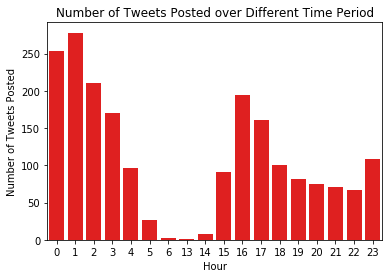

In [196]:
# At what time people tend to post tweets ?
base_color = sb.color_palette()[0]
sb.countplot(data = df1,x = 'time', color = 'red')
plt.title('Number of Tweets Posted over Different Time Period')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets Posted')

Text(0.5,1,'The Relationship between Time and Retweet Counts & Favorite Counts')

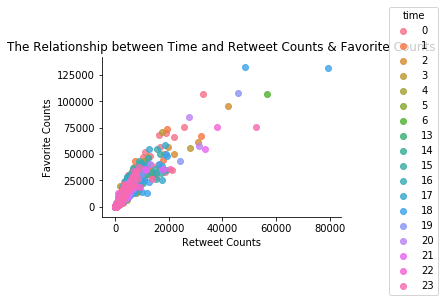

In [197]:
# plot the relationship between time and retweet & favorite counts 
g = sb.FacetGrid(data = df1 , hue = 'time', aspect = 1.5 )
g = g.map( sb.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Time and Retweet Counts & Favorite Counts')

# Conclusion: 

According to the plot, we can see there are two activity peaks 0-3 and 16-17. Users like to post tweets either at the time before off work or late night(even 3 am belongs to early morning but It is more likely they stay late until 3 am rather than they get up at 3 am to post tweets).

It is shown that tweets posted at evening time or late night gains more retweets and favorites. It is generally consistent with the two activity peaks. More users are active at the peorids, which generate more retweets and favorite counts.

# Q 2) What are the most popular breeds?

In [198]:
# Gropuby df by breed
breed=df1.groupby(by='p1')[['retweet_count','favorite_count']].sum()
#Select the most popular 10 breeds
breed_favorite=breed.sort_values(by='favorite_count', ascending=False)['favorite_count'].head(10)
breed_retweet=breed.sort_values(by='retweet_count', ascending=False)['retweet_count'].head(10)

Text(0.5,1,'Retweet count by breed')

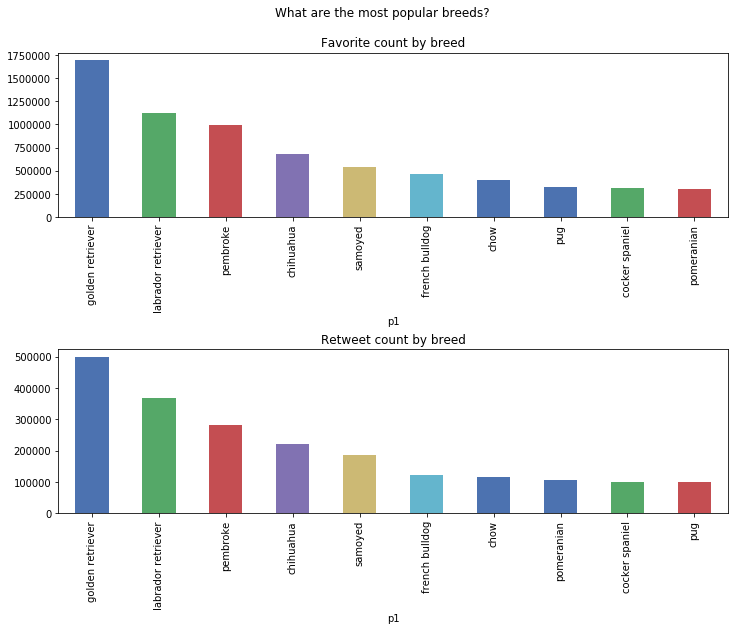

In [199]:
#Set matplotlib style
plt.style.use('seaborn-deep')
#Plotting
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
figure.suptitle('What are the most popular breeds?')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
breed_favorite.plot(kind='bar', ax=axes[0]).set_title('Favorite count by breed')
breed_retweet.plot(kind='bar', ax=axes[1]).set_title('Retweet count by breed')

# Conclusion:

The most popular breeds of dogs are Golden Retriever and Labrador retriever.
In both 'retweet_count' and 'favorite_count' the most popular breeds are the same, 
only the order changes.

The four most popular breeds are:

Golden retriever

Labrador retriever

Chihuahua

Pembroke

An image depicting a Golden retriever on average gets 11,310.85 favorites and 3,874.47 retweets.



In [200]:
# Gropuby df by breed
breed=df1.groupby(by='p2')[['retweet_count','favorite_count']].sum()
#Select the most popular 10 breeds
breed_favorite=breed.sort_values(by='favorite_count', ascending=False)['favorite_count'].head(10)
breed_retweet=breed.sort_values(by='retweet_count', ascending=False)['retweet_count'].head(10)

Text(0.5,1,'Retweet count by breed')

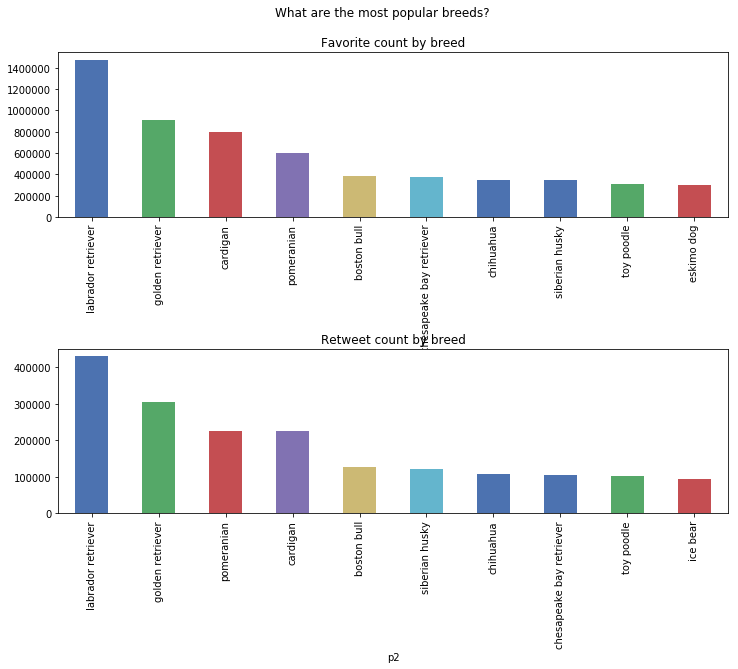

In [201]:
#Set matplotlib style
plt.style.use('seaborn-deep')
#Plotting
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
figure.suptitle('What are the most popular breeds?')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
breed_favorite.plot(kind='bar', ax=axes[0]).set_title('Favorite count by breed')
breed_retweet.plot(kind='bar', ax=axes[1]).set_title('Retweet count by breed')

# Conclusion:

The most popular breeds of dogs are Labrador retriever and Golden Retriever. In both 'retweet_count' and 'favorite_count' the most popular breeds are the same, only the order changes.

The four most popular breeds are:

Labrador retriever

Golden retriever

pomeranian

cardigan

An image depicting a Labrador retriever on average gets 1400000 favorites and 450000 retweets.

In [202]:
# Gropuby df by breed
breed=df1.groupby(by='p3')[['retweet_count','favorite_count']].sum()
#Select the most popular 10 breeds
breed_favorite=breed.sort_values(by='favorite_count', ascending=False)['favorite_count'].head(10)
breed_retweet=breed.sort_values(by='retweet_count', ascending=False)['retweet_count'].head(10)

Text(0.5,1,'Retweet count by breed')

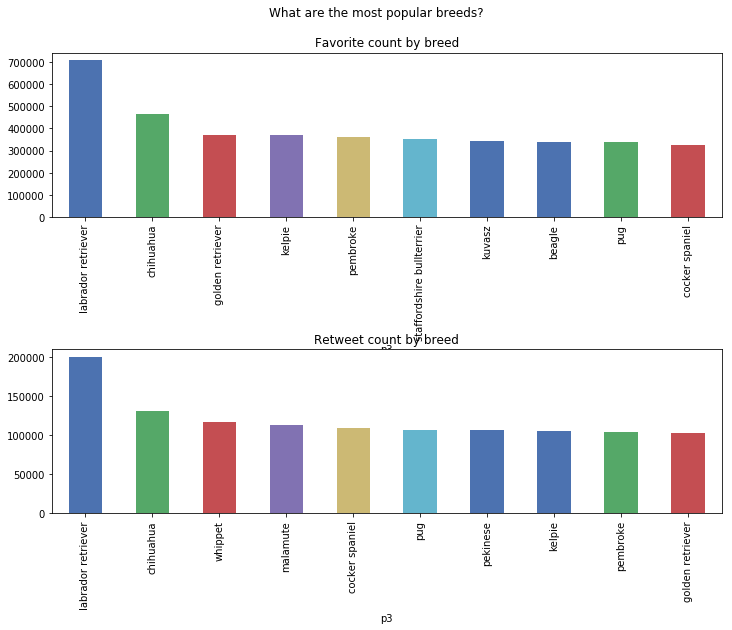

In [203]:
#Set matplotlib style
plt.style.use('seaborn-deep')
#Plotting
plt.figure()
figure, axes = plt.subplots(2, 1)
figure.set_figheight(8)
figure.set_figwidth(12)
figure.suptitle('What are the most popular breeds?')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.8)
breed_favorite.plot(kind='bar', ax=axes[0]).set_title('Favorite count by breed')
breed_retweet.plot(kind='bar', ax=axes[1]).set_title('Retweet count by breed')

# Conclusion:

The most popular breeds of dogs are Labrador retriever and chihuahua. In both 'retweet_count' and 'favorite_count' the most popular breeds are the same, only the order changes.

The four most popular breeds are:

Labrador retriever

chihuahua

kelpie

golden retriever

An image depicting a Labrador retriever on average gets 700000 favorites and 200000 retweets.

# Q 3) What is the relationship between dog stages and retweet counts and favorite counts ?

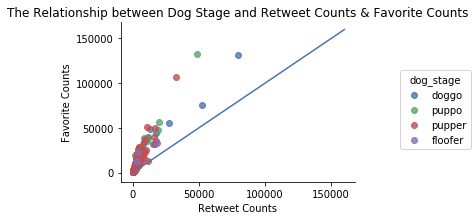

In [204]:
g = sb.FacetGrid(data = df1 , hue = 'dog_stage', aspect = 1.5)
g = g.map( sb.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.08, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Dog Stage and Retweet Counts & Favorite Counts')
plt.plot([0, 160000], [0, 160000], '-')

# Conclusion:

We can observe that in our plot that most of the tweets have less than 40,000 favorites and less than 20,000 favorites. We also notice that from the equation for the line of best fit that there tends to be 3 times as many favorites as retweets. However we notice that as the values get larger, the ratio of retweets to favorites get larger (further above the line of best fit).

When we highlight the dog stages (ignoring those that were not classified), we see the smaller values bunch below the original line of best fit.